# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
import numpy as np
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [3]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]
for column in date:
    client_df[column] = pd.to_datetime(client_df[column])

From the above table, it can be observed that some values in the column of "channel_sales" is given as MISSING. This can be the values that are deliberately added for the data which are MISSING.

In [5]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"])

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [9]:
client_df.describe().T

,count,mean,min,25%,50%,75%,max,std
cons_12m,14606.0,159220.286252,0.0,5674.75,14115.5,40763.75,6207104.0,573465.264198
cons_gas_12m,14606.0,28092.375325,0.0,0.0,0.0,0.0,4154590.0,162973.059057
cons_last_month,14606.0,16090.269752,0.0,0.0,792.5,3383.0,771203.0,64364.196422
date_activ,14606,2011-01-28 07:54:18.879912448,2003-05-09 00:00:00,2010-01-15 00:00:00,2011-03-04 00:00:00,2012-04-19 00:00:00,2014-09-01 00:00:00,NaN
date_end,14606,2016-07-27 20:48:26.422018560,2016-01-28 00:00:00,2016-04-27 06:00:00,2016-08-01 00:00:00,2016-10-31 00:00:00,2017-06-13 00:00:00,NaN
date_modif_prod,14606,2013-01-02 12:29:10.951663872,2003-05-09 00:00:00,2010-08-12 00:00:00,2013-06-19 00:00:00,2015-06-16 00:00:00,2016-01-29 00:00:00,NaN
date_renewal,14606,2015-07-21 06:59:00.353279488,2013-06-26 00:00:00,2015-04-17 00:00:00,2015-07-27 00:00:00,2015-10-29 00:00:00,2016-01-28 00:00:00,NaN
forecast_cons_12m,14606.0,1868.61488,0.0,494.995,1112.875,2401.79,82902.83,2387.571531
forecast_cons_year,14606.0,1399.762906,0.0,0.0,314.0,1745.75,175375.0,3247.786255
forecast_discount_energy,14606.0,0.966726,0.0,0.0,0.0,0.0,30.0,5.108289


In [10]:
price_df.describe().T

,count,mean,min,25%,50%,75%,max,std
price_date,193002,2015-06-16 12:50:49.933161216,2015-01-01 00:00:00,2015-04-01 00:00:00,2015-07-01 00:00:00,2015-10-01 00:00:00,2015-12-01 00:00:00,NaN
price_off_peak_var,193002.0,0.141027,0.0,0.125976,0.146033,0.151635,0.2807,0.025032
price_peak_var,193002.0,0.05463,0.0,0.0,0.085483,0.101673,0.229788,0.049924
price_mid_peak_var,193002.0,0.030496,0.0,0.0,0.0,0.072558,0.114102,0.036298
price_off_peak_fix,193002.0,43.334477,0.0,40.728885,44.26693,44.44471,59.44471,5.410297
price_peak_fix,193002.0,10.622875,0.0,0.0,0.0,24.339581,36.490692,12.841895
price_mid_peak_fix,193002.0,6.409984,0.0,0.0,0.0,16.226389,17.458221,7.773592


Check for missing values

In [11]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [12]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

The above cells imply that there are no values in the data which are empty or has value of NaN.

Check for unique values

In [13]:
client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [14]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

From the above cells, it is observed that price_df has unique 16096 customer ids when compared to that of client_df which are only 14606. The data which is not available in either of the data sets can be either given a NaN value or be ignored. A combined data frames grouping the 2 datasets together can be used for further analysis.

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [15]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

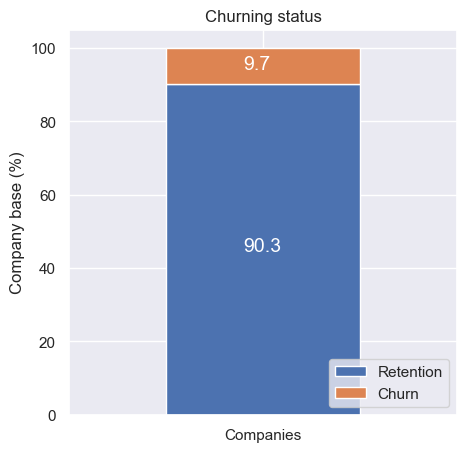

In [16]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

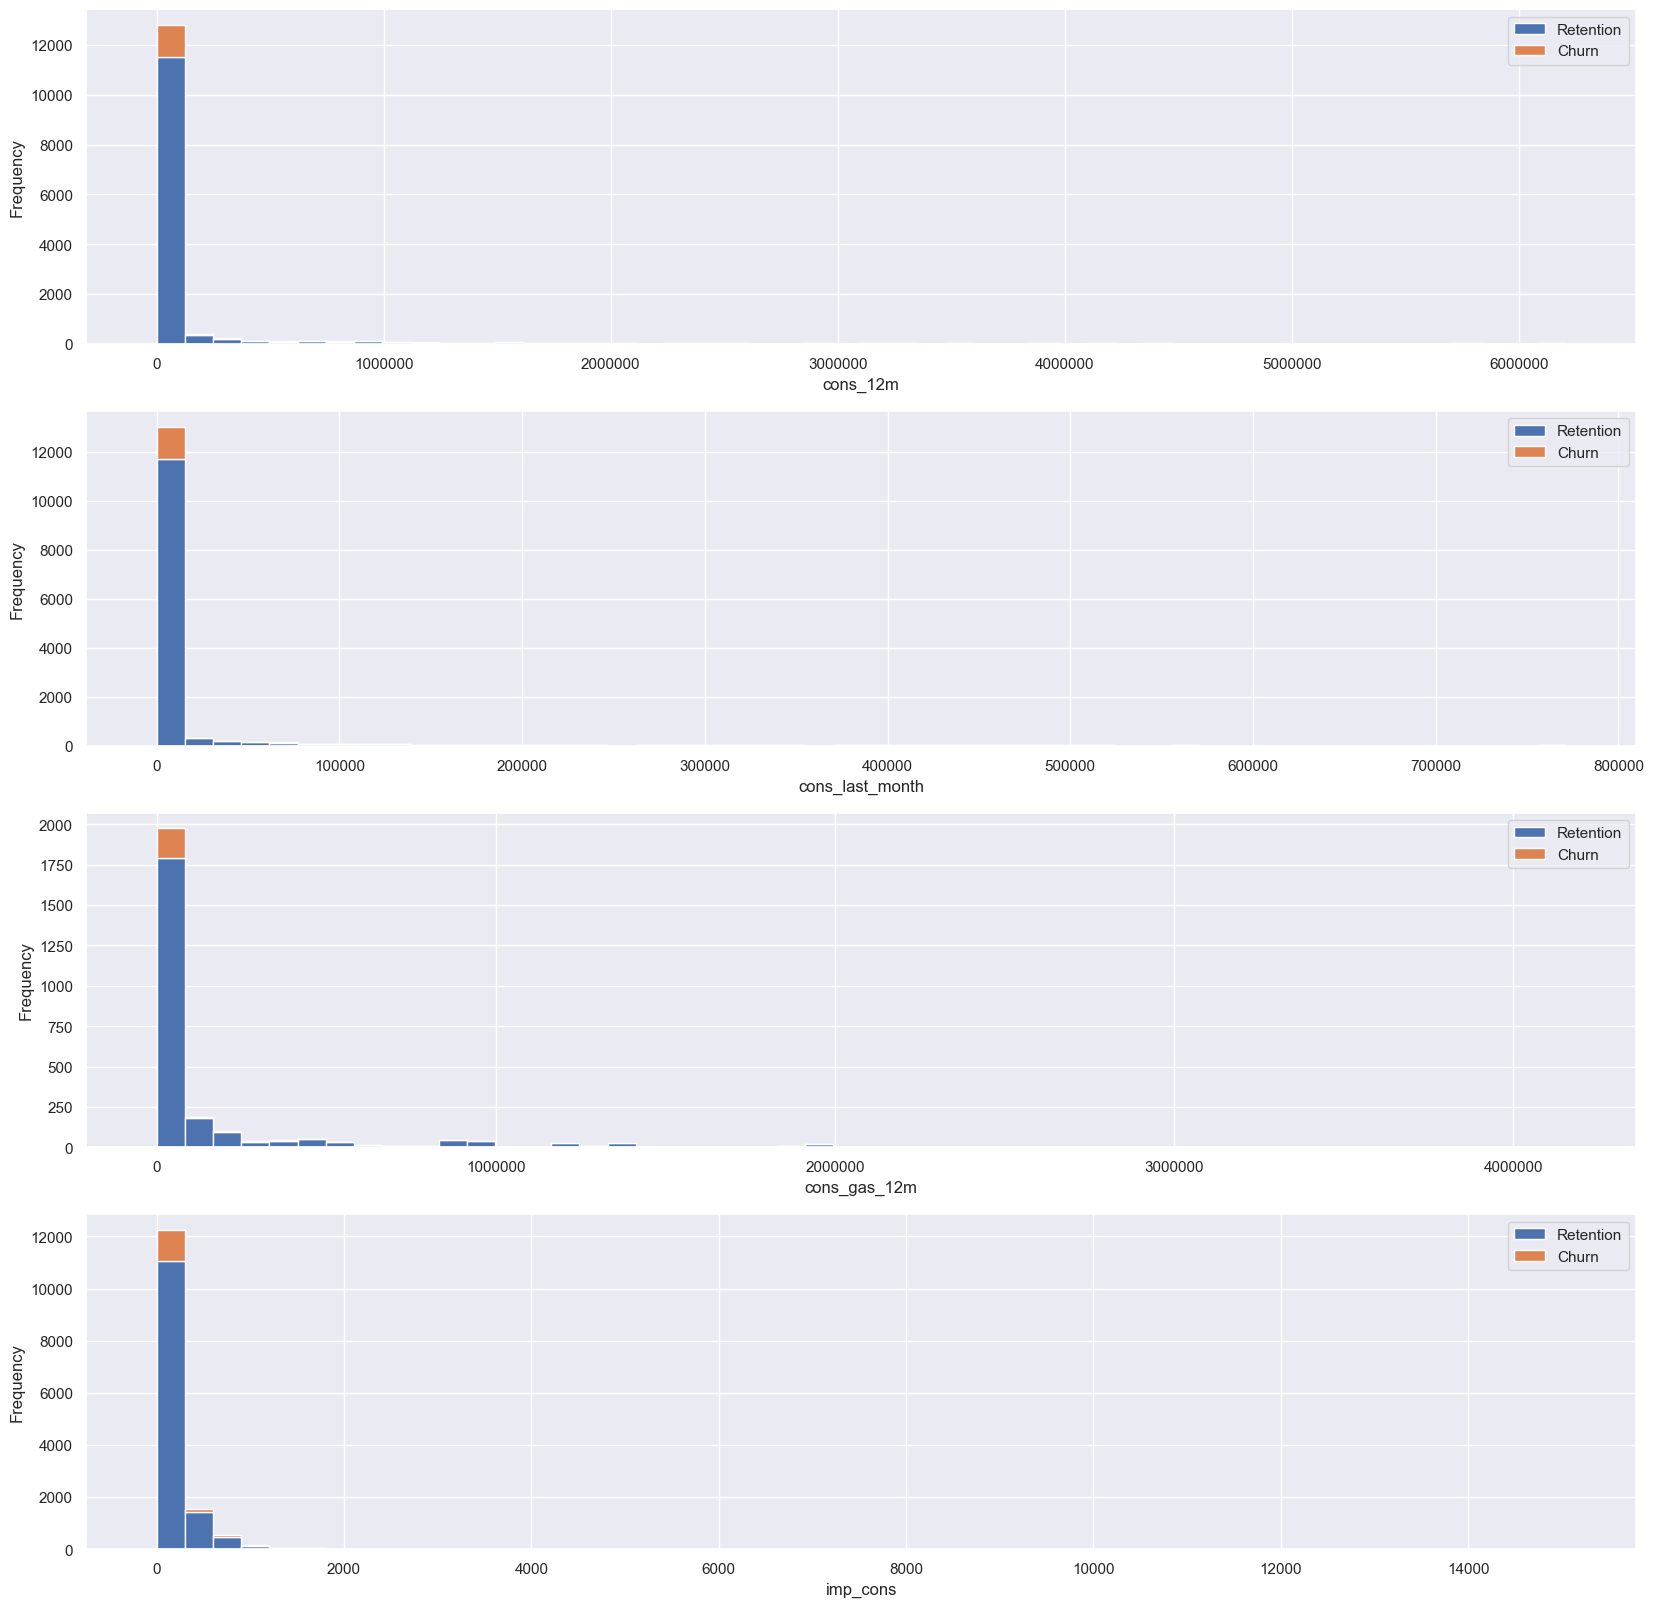

In [17]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(20, 20))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption, 'cons_last_month', axs[1])
plot_distribution(consumption[consumption["has_gas"]=='t'], 'cons_gas_12m', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])


The above plots indicate that majority of the companies consumption is 0. Moreover to check for outliers, box plots can be used.

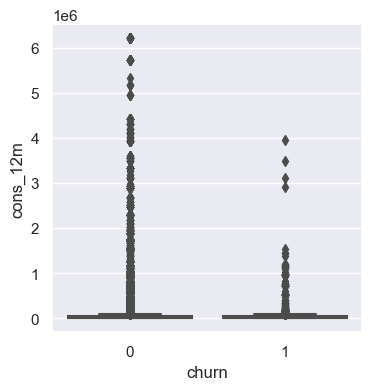

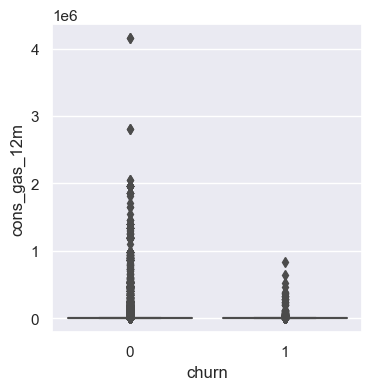

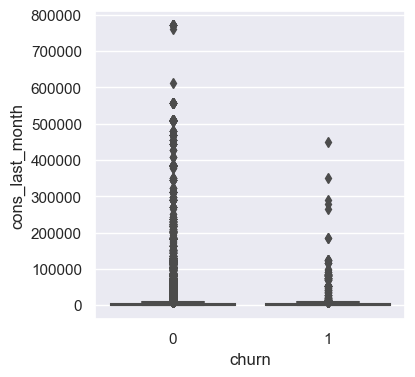

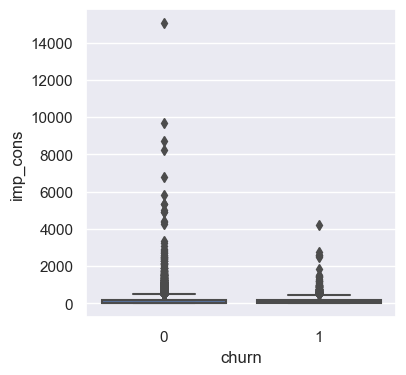

In [18]:
consumption_box = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]
for column in consumption_box:
    plt.figure(figsize=(4,4))
    sns.boxplot(client_df, y=consumption_box[column], x = 'churn')
    plt.show()

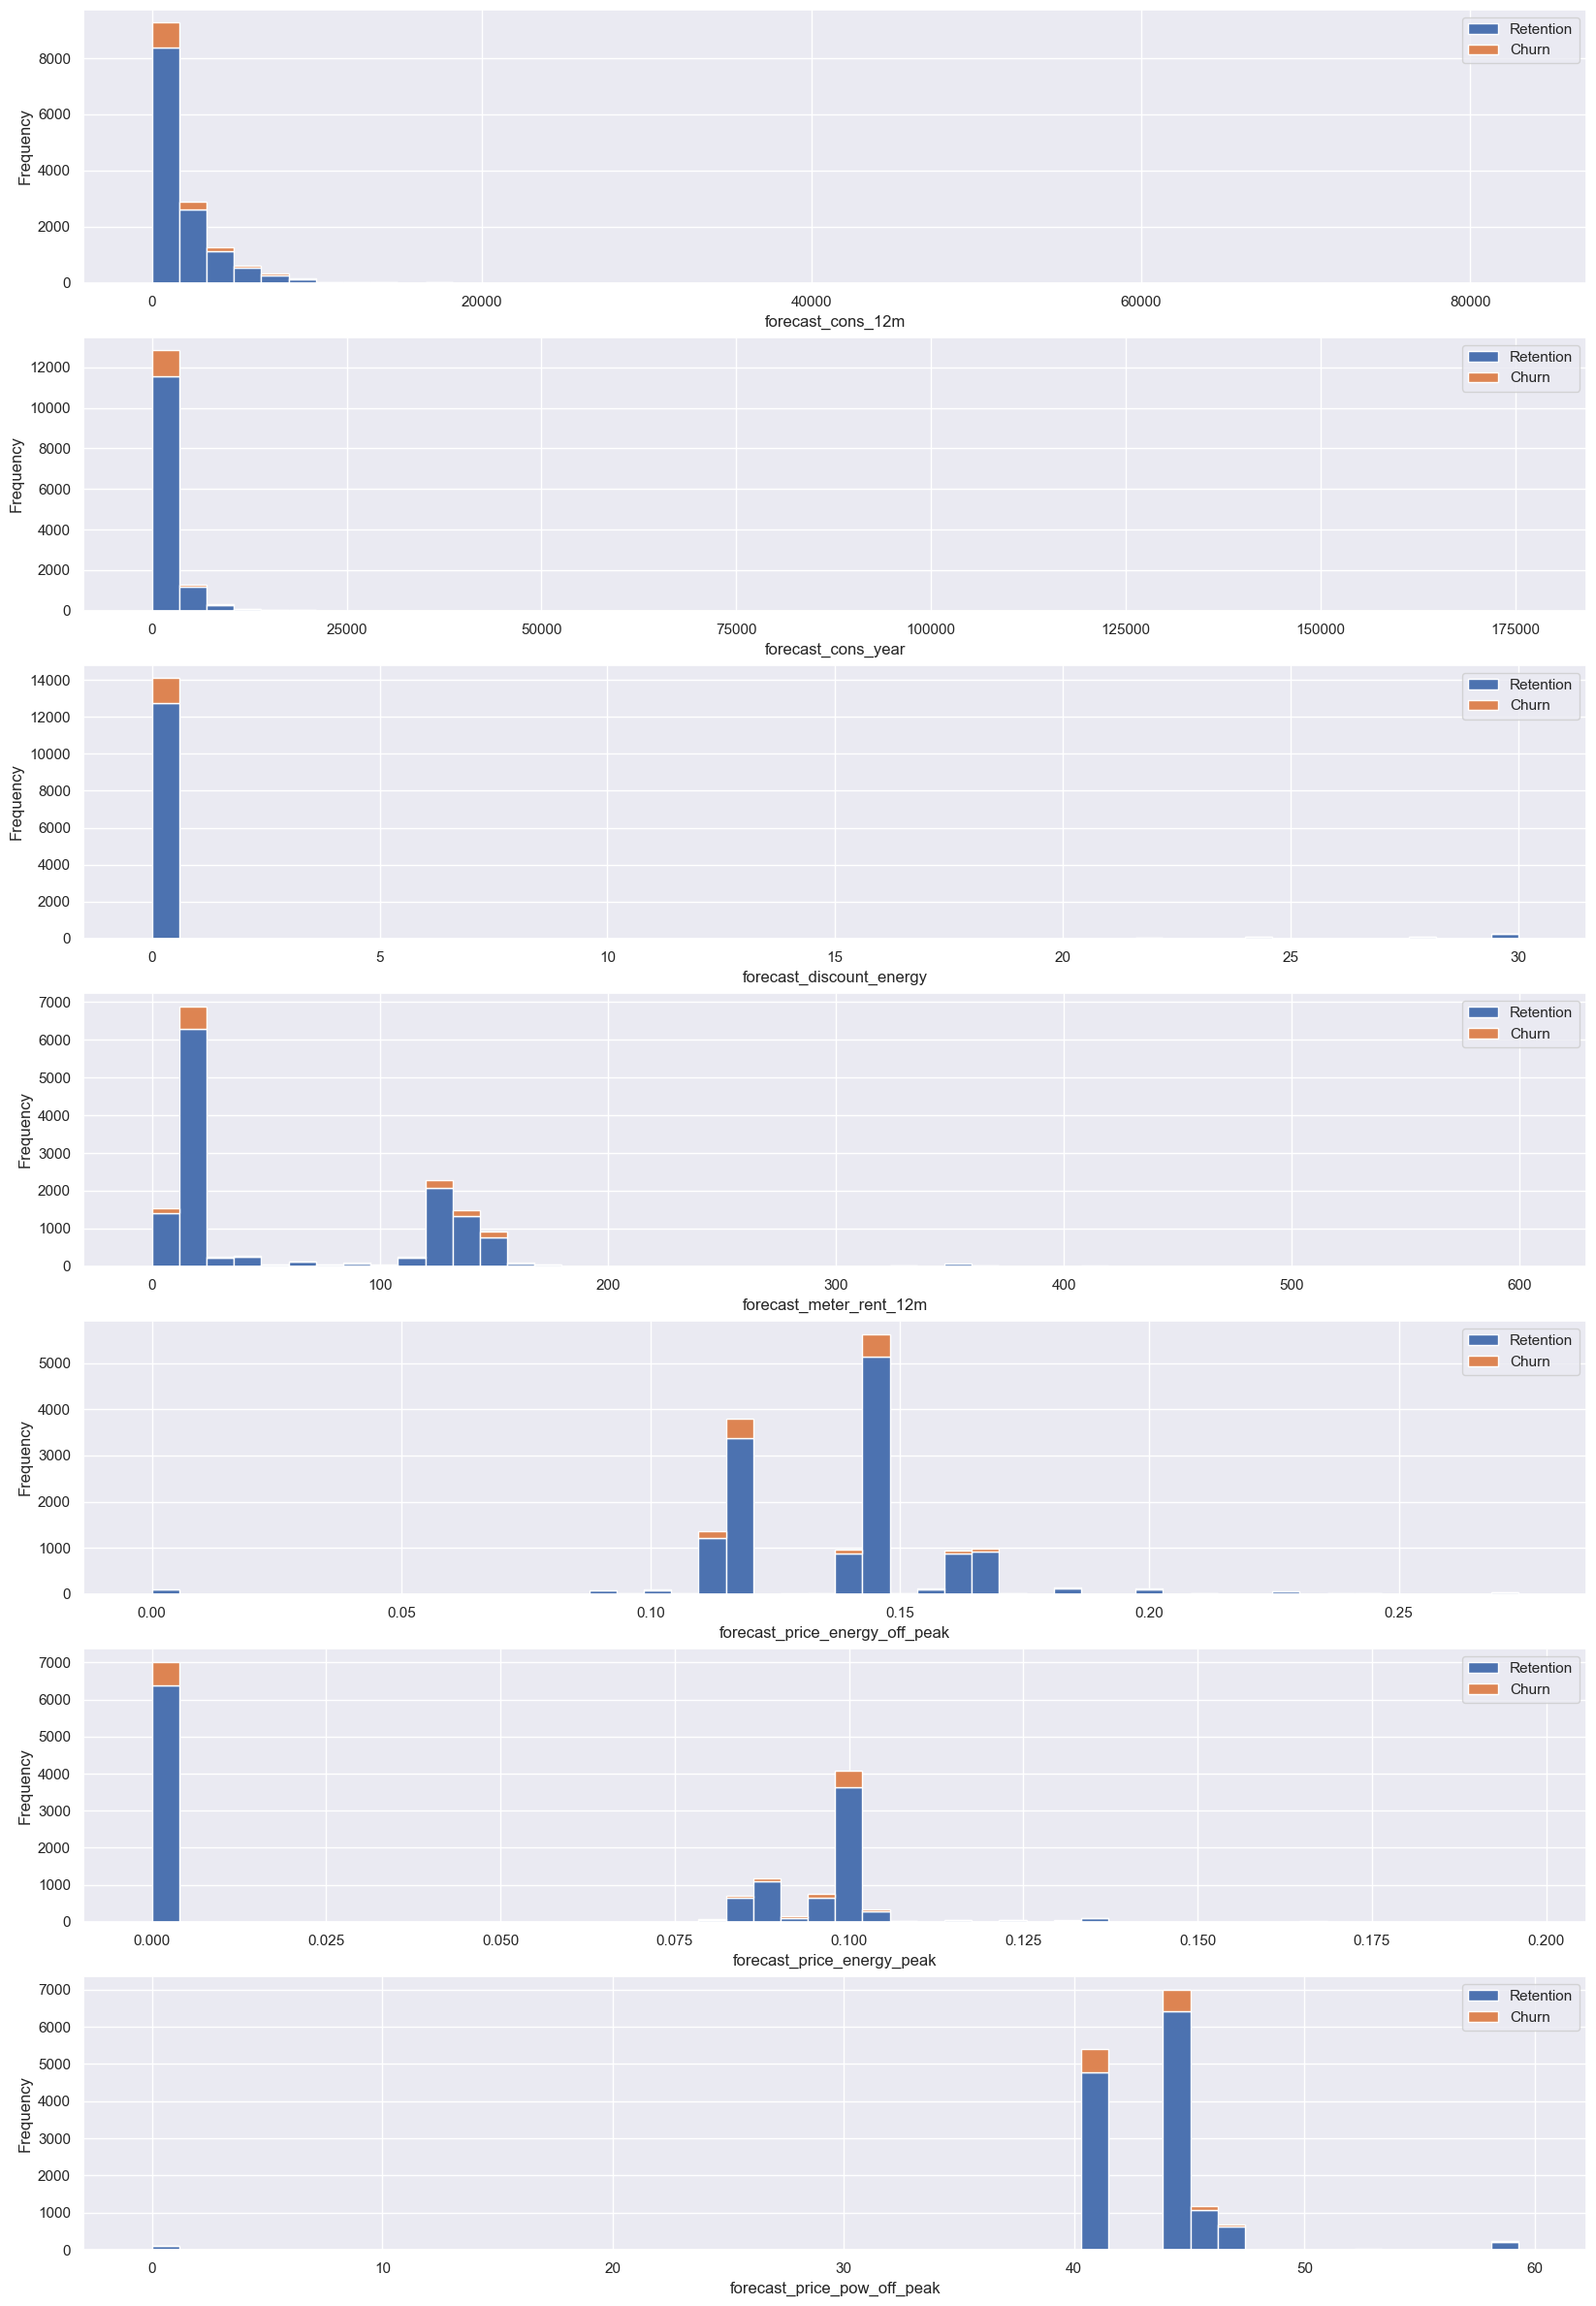

In [19]:
Forecasting = client_df[['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak','churn']]
fig, axs = plt.subplots(nrows=7, figsize=(20, 30))

plot_distribution(Forecasting, 'forecast_cons_12m', axs[0])
plot_distribution(Forecasting, 'forecast_cons_year', axs[1])
plot_distribution(Forecasting, 'forecast_discount_energy', axs[2])
plot_distribution(Forecasting, 'forecast_meter_rent_12m', axs[3])
plot_distribution(Forecasting, 'forecast_price_energy_off_peak', axs[4])
plot_distribution(Forecasting, 'forecast_price_energy_peak', axs[5])
plot_distribution(Forecasting, 'forecast_price_pow_off_peak', axs[6])


Categorical Attributes

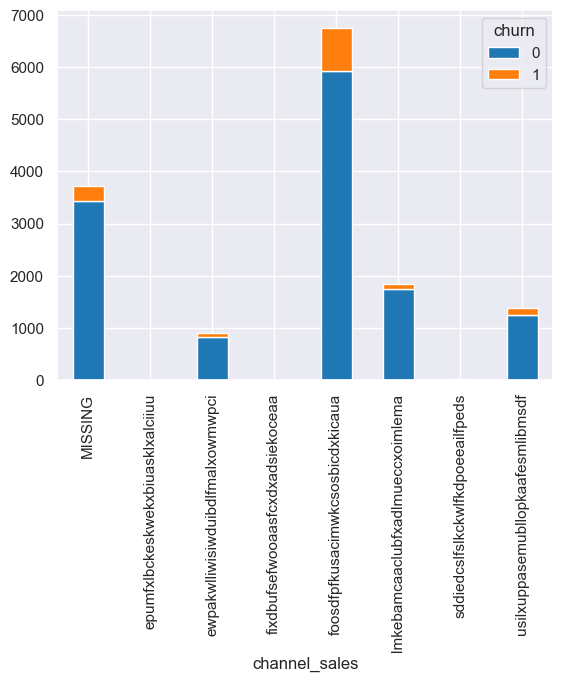

In [20]:
count_df = client_df.groupby(['channel_sales', 'churn']).size().unstack()

# Plot a stacked bar plot
count_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.show()

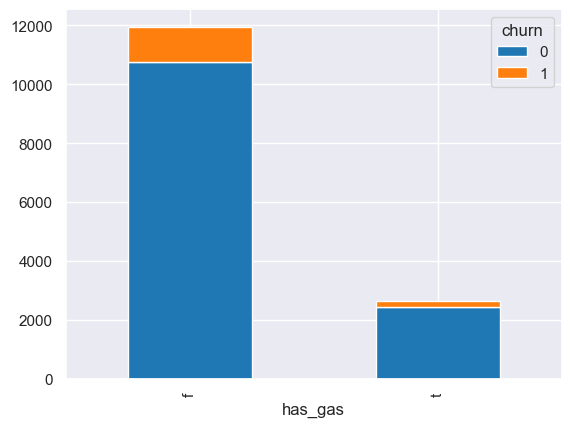

In [21]:
count_df = client_df.groupby(['has_gas', 'churn']).size().unstack()

# Plot a stacked bar plot
count_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.show()

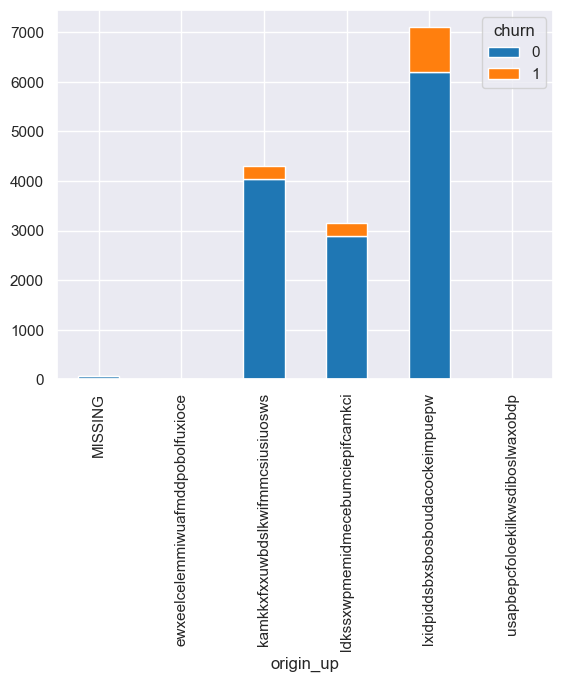

In [22]:
count_df = client_df.groupby(['origin_up', 'churn']).size().unstack()

# Plot a stacked bar plot
count_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.show()

Price_df

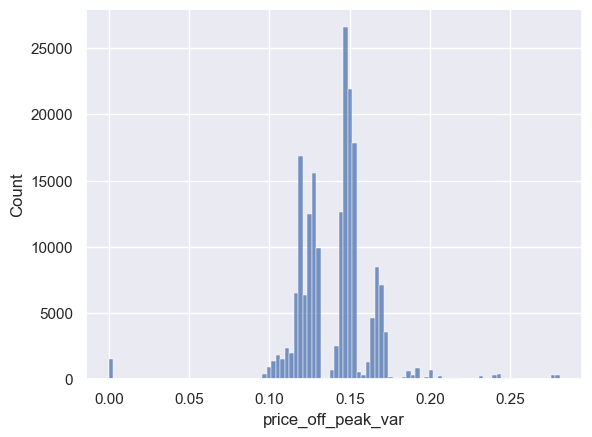

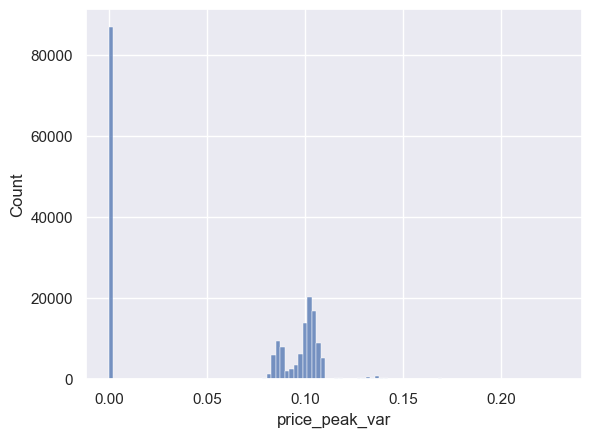

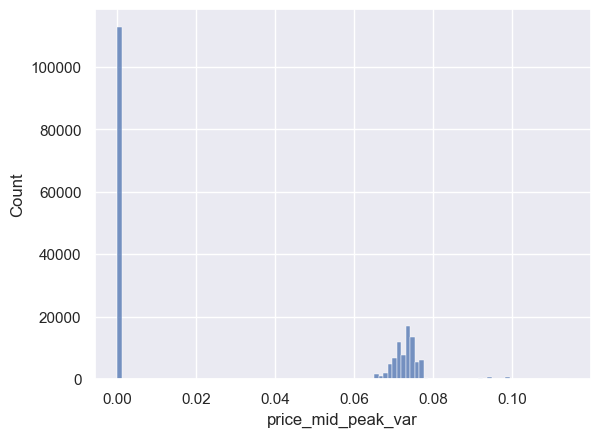

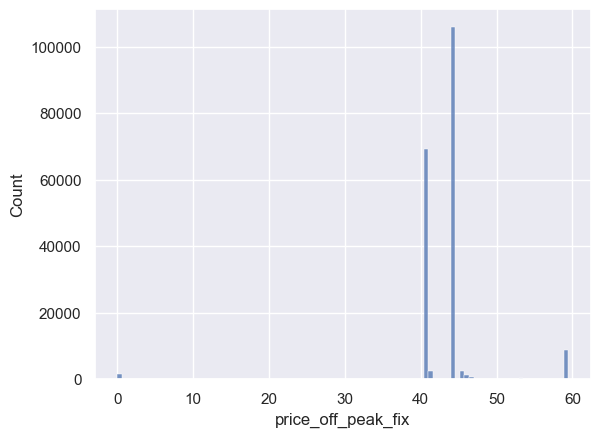

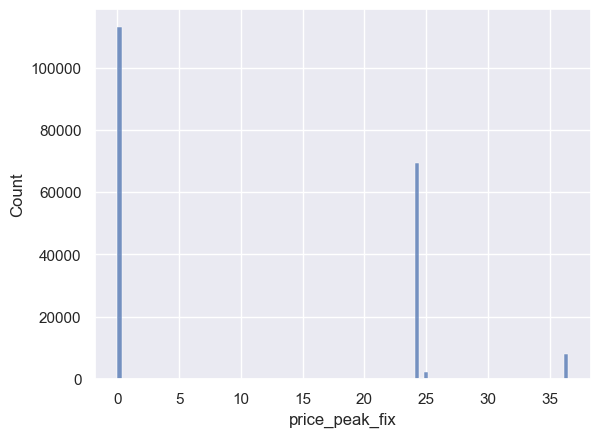

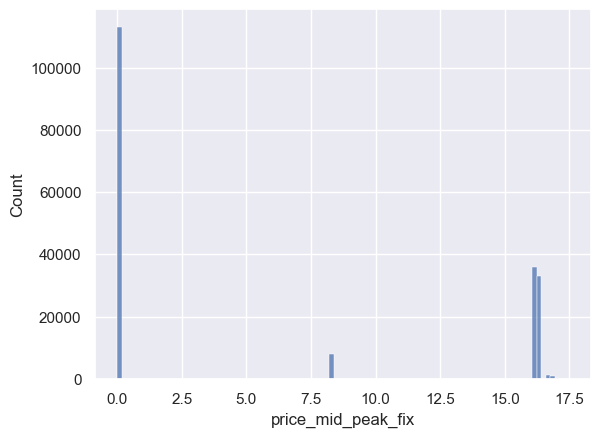

In [23]:
#price=price_df[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix']]
sns.histplot(price_df,x='price_off_peak_var' , bins=100)
plt.show()
sns.histplot(price_df,x='price_peak_var' , bins=100)
plt.show()
sns.histplot(price_df,x='price_mid_peak_var' , bins=100)
plt.show()
sns.histplot(price_df,x='price_off_peak_fix' , bins=100)
plt.show()
sns.histplot(price_df,x='price_peak_fix' , bins=100)
plt.show()
sns.histplot(price_df,x='price_mid_peak_fix' , bins=100)
plt.show()

Price sensitivity hypothesis test:
For this we will add a new feature which is the percentage change in price within 3 months as churn data is available for the next 3 months.

In [24]:
price_df['total_price'] = price_df['price_off_peak_var'] + price_df['price_peak_var'] + price_df['price_mid_peak_var'] + \
                    price_df['price_off_peak_fix'] + price_df['price_peak_fix'] + price_df['price_mid_peak_fix']

# Calculate percentage change in total price over a specific time period (e.g., 3 months)
price_df['percentage_change'] = price_df.groupby('id')['total_price'].pct_change(3) * 100


,id,price_date,total_price,percentage_change
0,038af19179925da21a25619c5a24b745,2015-01-01,44.418298,NaN
1,038af19179925da21a25619c5a24b745,2015-02-01,44.418298,NaN
2,038af19179925da21a25619c5a24b745,2015-03-01,44.418298,NaN
3,038af19179925da21a25619c5a24b745,2015-04-01,44.416557,-0.003920
4,038af19179925da21a25619c5a24b745,2015-05-01,44.416557,-0.003920
...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,81.756175,0.384231
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,81.756175,0.384231
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,81.756175,-0.015145
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,81.756175,0.000000


In [33]:
price_churn = pd.merge(client_df[['id', 'churn']], price_df,on='id')

In [34]:
price_churn.head()

,id,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,total_price,percentage_change
0,24011ae4ebbe3035111d65fa7c15bc57,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,81.432846,NaN
1,24011ae4ebbe3035111d65fa7c15bc57,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,81.432846,NaN
2,24011ae4ebbe3035111d65fa7c15bc57,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,81.432841,NaN
3,24011ae4ebbe3035111d65fa7c15bc57,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,81.432841,-0.000006
4,24011ae4ebbe3035111d65fa7c15bc57,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,81.432841,-0.000006


In [35]:
price_churn = price_churn.dropna(subset='total_price')
correlation_matrix = price_churn[['total_price', 'churn']].corr()

# Extract the correlation coefficient between 'total_price' and 'churn'
correlation_total_price_churn = correlation_matrix.loc['total_price', 'churn']

# Print the result
print(f"Correlation between 'total_price' and 'churn': {correlation_total_price_churn}")


Correlation between 'total_price' and 'churn': 0.05187921240574864


it is observed that there is very little correlation between the total price and churn.

In [36]:
price_churn = price_churn.dropna(subset='percentage_change')
price_churn.head(5)


,id,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,total_price,percentage_change
3,24011ae4ebbe3035111d65fa7c15bc57,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,81.432841,-0.000006
4,24011ae4ebbe3035111d65fa7c15bc57,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,81.432841,-0.000006
5,24011ae4ebbe3035111d65fa7c15bc57,1,2015-06-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,81.432841,0.000000
6,24011ae4ebbe3035111d65fa7c15bc57,1,2015-07-01,0.125640,0.103963,0.073873,40.728885,24.437330,16.291555,81.761246,0.403283
7,24011ae4ebbe3035111d65fa7c15bc57,1,2015-08-01,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,81.748862,0.388076


In [37]:
correlation_matrix_2 = price_churn[['percentage_change', 'churn']].corr()

# Extract the correlation coefficient between 'percentage_change' and 'churn'
correlation_percentage_change_churn = correlation_matrix_2.loc['percentage_change', 'churn']

# Print the result
print(f"Correlation between 'percentage_change' and 'churn': {correlation_percentage_change_churn}")

Correlation between 'percentage_change' and 'churn': -0.003162545178018523


It can be observed that there is very no correlation between the percentage change and churn.

In [39]:
selected_columns = ['churn', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                     'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
                     'total_price', 'percentage_change']
price_churn = price_churn.dropna()
# Calculate correlation matrix
correlation_matrix_3 = price_churn[selected_columns].corr()
correlation_matrix_3["churn"].sort_values(ascending=False)

churn                 1.000000
total_price           0.050553
price_peak_fix        0.046178
price_mid_peak_var    0.045365
price_mid_peak_fix    0.043842
price_peak_var        0.028635
price_off_peak_fix    0.013457
percentage_change    -0.003163
price_off_peak_var   -0.008358
Name: churn, dtype: float64